In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [2]:
class perceptron():
    def __init__(self, eps = 0.0000001, alpha = 0.1, max_iter = 1000):
        self.eps = eps
        self.alpha = alpha
        self.max_iter = max_iter
        
    def grad_loss(self, x, y):
        y_pred = np.array([1 if a > 0 else 0 for a in x.dot(self.w)]).reshape((x.shape[0], 1))
        dL_dw = ((y_pred-y)*x).mean(axis=0).reshape(self.w.shape)
        return dL_dw
    
    def predict(self, X):
        self.b = np.ones((X.shape[0],1))
        x = np.hstack((self.b, X))
        return [1 if a > 0 else 0 for a in x.dot(self.w)]
        
    def fit(self, x, y):
        self.w = np.ones((x.shape[1]+1,1))
        self.b = np.ones((x.shape[0],1))
        x = np.hstack((self.b, x))
        grad_L = self.grad_loss(x, y)
        i_iter = 1
        while(np.linalg.norm(grad_L) > self.eps and i_iter < self.max_iter):
            self.w -= self.alpha*grad_L
            grad_L = self.grad_loss(x, y)
            i_iter += 1

In [3]:
class LogisticRegression_():
    def __init__(self, eps = 0.000001, alpha = 0.1, max_iter = 1000):
        self.eps = eps
        self.alpha = alpha
        self.max_iter = max_iter
        
    def sigm(self, a):
        return 1./(1. + np.exp(-a))
    
    def grad_sigm(self, a):
        one = np.ones(a.shape)
        return self.sigm(a)*(one - self.sigm(a))

        
    def grad_loss(self, x, y):
        y_pred = self.sigm(x.dot(self.w))
        dL_dw = ((y_pred-y)*self.grad_sigm(x.dot(self.w))*x).sum(axis=0).reshape(self.w.shape)
        return dL_dw
    
    def predict(self, X):
        self.b = np.ones((X.shape[0],1))
        x = np.hstack((self.b, X))
        return [1 if x >= 0.5 else 0 for x in self.sigm(x.dot(self.w))]
        
    def fit(self, X, y):
        self.w = np.ones((X.shape[1]+1,1))
        self.b = np.ones((X.shape[0],1))
        x = np.hstack((self.b, X))
        grad_L = self.grad_loss(x, y)
        i_iter = 1
        while(np.linalg.norm(grad_L) > self.eps and i_iter < self.max_iter):
            self.w -= self.alpha*grad_L
            grad_L = self.grad_loss(x, y) 
            i_iter += 1

In [4]:
iris = load_iris()
shapeXY = shuffle(np.hstack((iris.data[:100],
                             iris.target[:100].reshape((100,1)))))
X = shapeXY[:,:4]
Y = shapeXY[:,4].reshape((100,1))

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.1, random_state=0)
per = perceptron()
per.fit(X_train, Y_train)

In [6]:
print(per.predict(X_test))

[1, 0, 1, 1, 0, 1, 1, 0, 0, 0]


In [7]:
print(Y_test.flatten())

[1. 0. 1. 1. 0. 1. 1. 0. 0. 0.]


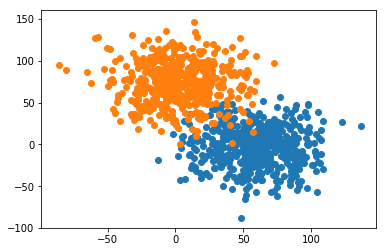

In [9]:
from sklearn.datasets import make_biclusters

dataset = make_biclusters((1000,2), 2, noise = 25, random_state = 0)

target = np.array([0 if x else 1 for x in dataset[1][0]])
import matplotlib.pyplot as plt

plt.scatter(dataset[0][dataset[1][0]][:,0], dataset[0][dataset[1][0]][:,1])
plt.scatter(dataset[0][False == dataset[1][0]][:,0], dataset[0][False == dataset[1][0]][:,1])
plt.show()

In [10]:
data_train, data_test, target_train, target_test = train_test_split(dataset[0], target.reshape((1000,1)), test_size = 0.01)
per = perceptron()
per.fit(data_train, target_train)
lr = LogisticRegression_()
lr.fit(data_train, target_train)

from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression(tol = 0.0001, max_iter = 1000)
lr2.fit(data_train, target_train)

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
print('Perc=  ', per.predict(data_test))
print('LogReg_my=', lr.predict(data_test))
print('LogReg=', lr2.predict(data_test))
print('Real= ', target_test.flatten())

Perc=   [1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
LogReg_my= [1, 1, 0, 0, 0, 0, 0, 1, 0, 0]
LogReg= [1 1 0 0 0 0 0 1 0 0]
Real=  [1 1 0 0 0 0 0 1 0 0]
